## Final Project Submission

* Student name: Marvin Mills
* Student pace: part-time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL:


# Getting Started
To start, I'll import everything I see as necessary to get this done. I've imported the usual suspects -- pandas, numpy, matplotlib -- but also, I'll be importing "Time" to do API request rests as well as "Locale" and "FuncFormatter" which I'm hoping both will help with displaying currency on the visualizations.

Moreover, I'll be primarily, if not exclusively, using <b>TMDBSimple</b> to complete this research & recommendation for Microsoft. I've also gone ahead and found out how to call my API key without showing my API key here in the notebook. It also shouldn't show when I push to Github.

In [1]:
import emoji
print(emoji.emojize("Let's get started!!!" ":thumbs_up:"))

Let's get started!!!👍


In [2]:
#Importing all of the important items here
import pandas as pd
import numpy as np
import locale
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tickie
import squarify
import seaborn as sns
from matplotlib.ticker import FuncFormatter
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

In [3]:
#Importing tmdbsimple as well as config so as to keep API Key hidden.
import tmdbsimple as tmdb
import config
tmdb.API_KEY = config.api_key

# Before The Work: Getting To Know The Data + Determining Approach

This first section -- below -- is where I get to know the nature of the data, while using tmdb simple. My goal is to determine what columns there are, and this will help me to decide on which questions I'd like to ask.

In [4]:
#Initial, manual accessing of the dataset per the "response" list found at: 
#https://developers.themoviedb.org/3/movies/get-movie-details

cool = 2
movie = tmdb.Movies(cool)
response = movie.info()

#These represent the diversity of information available for the movies in the database. There is more, of course.
print(movie.title)
print(movie.budget)
print(movie.revenue)
print(movie.release_date)
print(movie.runtime)
print(movie.genres)
print(movie.tagline)
print(movie.status)
print(movie.popularity)
print(movie.overview)

Ariel
0
0
1988-10-21
73
[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}]

Released
11.124
Taisto Kasurinen is a Finnish coal miner whose father has just committed suicide and who is framed for a crime he did not commit. In jail, he starts to dream about leaving the country and starting a new life. He escapes from prison but things don't go as planned...


## *** Accessing The Data ***
The good thing is that I can see clearly what the data looks like. But now, the goal is to figure out how to loop through the data to get this information for <b>1000 movies from the database</b>. I wonder whether I can loop through the data using the "movie.info()" method. When trying to loop through using <b>a range of numbers</b> there is a <b>404 Error</b> that comes up with some numbers. So, I'll need to find a better way.

In [14]:
#cooler = [900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916]
#Used the above to test what happens when looping through the dataset

#NOTE: It's 915 that breaks the code in "cooler" and brings up the 404 error.

#pop_1000_ids is a variable introduced in a cell below to make the code work.
#Prior to this, I was using the "cooler" variable to test the loop, as mentioned above.
#The id's from pop_1000_ids are taken from looping through the "movie.popular()" method (see below)

leggo_my_eggo = pop_1000_ids
shaquille = []
counter = 1

for i in leggo_my_eggo:
    if counter < 20:
        movie = tmdb.Movies(i)
        response = movie.info()
        shaquille.append(response)
        print(movie.title, movie.budget, movie.revenue)
        counter += 1

Project Power 0 0
Tenet 205000000 0
Sputnik 0 0
The One and Only Ivan 0 0
Chemical Hearts 0 0
Teenage Mutant Ninja Turtles 125000000 477200000
Avengers: Infinity War 300000000 2046239637
The Sleepover 0 0
Joker 55000000 1074251311
Avengers: Age of Ultron 250000000 1405403694
Captain America: Civil War 250000000 1153296293
Inception 160000000 825532764
Ad Astra 87500000 132807427
The Secret Garden 0 0
Deathstroke: Knights & Dragons - The Movie 0 0
Rogue 0 0
The Crimes That Bind 0 0
Justice League 300000000 657924295
Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn) 75000000 201858461


## Iterating Through The Data: First Attempts

Now, let's use the "movie.popular()" method to loop through the Most Popular films from TMDB. In order to do this effectively, I'll be using "time.sleep" which will make the loop "rest" for a certain period so as not to access the API too quickly (I'm actually not sure whether my request is even considered "too much" but just in case I wanted to use the "time.sleep" option. I also see it as a good habit to form perhaps.

So, what I'll be doing here is:
<br>
<b>Loop through 50 pages of TMDB results, to get 1000 movies.</b>
<br>
I'll add the 1000 movies' info into a list (so it'll be a dictionary within a list), and then store the IDs and the Titles of the films into two different lists, respectively. I'll also check the length of the "popular_dict" list to verify whether there are 1000 entries.



In [5]:
print(type(tmdb.Movies()))

<class 'tmdbsimple.movies.Movies'>


In [6]:
a = tmdb.Movies()
abc = a.popular()

In [7]:
#I found some good insight and guidance for this here: 
#https://spandan-madan.github.io/DeepLearningProject/

popular_dict = []
pop_1000_ids = []
pop_1000_titles = []
for i in (range(1,51)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    popular_dict.extend(doop)

print(doop[1]['title'])
print(popular_dict[1]['title'])
len(popular_dict)

Scary Movie 2
Tenet


1000

## Successfully Stored Movies Into List. What's Next?

Now, I'll check the data a bit to see what's inside. I'll also run a For Loop to add the Titles and the IDs to their own lists. What I'm hoping to do is to be able to use these to call data from the "movie.info()" method, instead of looping through the data from 0 to 20, for example.
<br>
<b>OK, let's check for what's inside, run the For Loop to store Titles and IDs, as well as verify these as well.</b>

In [8]:
popular_dict[0]

{'popularity': 246.384,
 'vote_count': 676,
 'video': False,
 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg',
 'id': 605116,
 'adult': False,
 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg',
 'original_language': 'en',
 'original_title': 'Project Power',
 'genre_ids': [28, 80, 878],
 'title': 'Project Power',
 'vote_average': 6.7,
 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.',
 'release_date': '2020-08-14'}

In [9]:
doop[0]

{'popularity': 22.063,
 'vote_count': 1074,
 'video': False,
 'poster_path': '/cMlueArJXXwZbeLpb4NhC3pxmBk.jpg',
 'id': 519010,
 'adult': False,
 'backdrop_path': '/yCwcSCzcVKdI5Y9tA2T1s5Fr7jY.jpg',
 'original_language': 'es',
 'original_title': 'Dolor y gloria',
 'genre_ids': [18],
 'title': 'Pain and Glory',
 'vote_average': 7.5,
 'overview': 'Salvador Mallo, a filmmaker in the twilight of his career, remembers his life: his mother, his lovers, the actors he worked with. The sixties in a small village in Valencia, the eighties in Madrid, the present, when he feels an immeasurable emptiness, facing his mortality, the incapability of continuing filming, the impossibility of separating creation from his own life. The need of narrating his past can be his salvation.',
 'release_date': '2019-03-22'}

In [10]:
#Looping through the dictionary created to append the IDs and Titles to lists.
for i in popular_dict:
    pop_1000_ids.append(i['id'])
    pop_1000_titles.append(i['title'])
print(pop_1000_ids[0:20])
print(pop_1000_titles[0:20])

[605116, 577922, 594718, 508570, 621013, 98566, 299536, 626393, 475557, 99861, 271110, 27205, 419704, 521034, 703771, 718444, 632618, 141052, 495764, 539885]
['Project Power', 'Tenet', 'Sputnik', 'The One and Only Ivan', 'Chemical Hearts', 'Teenage Mutant Ninja Turtles', 'Avengers: Infinity War', 'The Sleepover', 'Joker', 'Avengers: Age of Ultron', 'Captain America: Civil War', 'Inception', 'Ad Astra', 'The Secret Garden', 'Deathstroke: Knights & Dragons - The Movie', 'Rogue', 'The Crimes That Bind', 'Justice League', 'Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)', 'Ava']


In [11]:
#Checking to see whether this ID matches with the ID above.
popular_dict[5]['id']

98566

## Turning List With Nested Dictionary Into a DataFrame

Now that I have the dictionary-organized data stored as a list (therefore as a dictionary within a list), I'll need to figure out how to create a DataFrame from this type of data (see below for the <b>type</b> of data the variable popular_dict stores as the first entry in the list). It's a <b>dictionary</b> as demonstrated below by checking the "type" of the dataset. So, what I'll do is use this data to create the main DataFrame I'll need.

In [12]:
print(type(popular_dict[0]))
print('---')
print(popular_dict[0].keys())
print('---')
print(popular_dict[0])

<class 'dict'>
---
dict_keys(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult', 'backdrop_path', 'original_language', 'original_title', 'genre_ids', 'title', 'vote_average', 'overview', 'release_date'])
---
{'popularity': 246.384, 'vote_count': 676, 'video': False, 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg', 'id': 605116, 'adult': False, 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg', 'original_language': 'en', 'original_title': 'Project Power', 'genre_ids': [28, 80, 878], 'title': 'Project Power', 'vote_average': 6.7, 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.', 'release_date': '2020-08-14'}


In [13]:
#Just in case I need to set columns at some point perhaps this will come in handy?
main_film_dict_columns = list(popular_dict[0])
main_film_dict_columns

['popularity',
 'vote_count',
 'video',
 'poster_path',
 'id',
 'adult',
 'backdrop_path',
 'original_language',
 'original_title',
 'genre_ids',
 'title',
 'vote_average',
 'overview',
 'release_date']

## Creating The Main DataFrame

OK, now to create the DataFrame and check all of the data a bit. It was a lot simpler than I'd expected.

In [15]:
#Creating the DataFrame from the Dictionary formed in a previous cell.
main_movie_df = pd.DataFrame(popular_dict)
main_movie_df.tail()

popularity  vote_count  video                       poster_path      id  \
995      21.993        1153  False  /xsbGcfH31Zv9gsjURnAsUFoSGra.jpg   13515   
996      21.989          84  False  /uZF4BZe45icLx7XVFUFnmLEemNm.jpg  501395   
997      21.984         267  False  /n6ogIDE1fq9sH0x6NFHgHNG2zJK.jpg   12212   
998      21.980        4257  False  /ezcS78TIjgr85pVdaPDd2rSPVNs.jpg  333484   
999      21.975        1574  False  /qJ9Cw1J4EmhBApoue4qlhqVrCZ7.jpg    9373   

     adult                     backdrop_path original_language  \
995  False  /ul5RJwqJYQ3zHUuKL5XmU7NMiRn.jpg                en   
996  False  /mPzJOUWOpQd0hy9p1UnBebfG1jZ.jpg                en   
997  False  /sOn1tOLzvhRaEtOdRP4dxmweNBN.jpg                en   
998  False  /xWxwM6UCzBTE9Hc9b31U1fBy5CJ.jpg                en   
999  False  /bpupiiGrBHSjq2tVyEvVAgFWZNv.jpg                en   

                     original_title           genre_ids  \
995                         Mirrors  [27, 9648, 53, 18]   
996  True History of the Kelly Gang            [80, 18]   
997        Urban Legends: Final Cut      [27, 9648, 53]   
998           The Magnificent Seven        [28, 12, 37]   
999     The Texas Chainsaw Massacre                [27]   

                              title  vote_average  \
995                         Mirrors           6.2   
996  True History of the Kelly Gang           6.0   
997        Urban Legends: Final Cut           4.7   
998           The Magnificent Seven           6.3   
999     The Texas Chainsaw Massacre           6.2   

                                              overview release_date  
995  An ex-cop and his family are the target of an ...   2008-08-15  
996  Set against the badlands of colonial Australia...   2020-01-09  
997  The making of a horror movie takes on a terrif...   2000-09-22  
998  Looking to mine for gold, greedy industrialist...   2016-09-14  
999  After picking up a traumatized young hitchhike...   2003-05-21

## Learning From Early Exploration of the Data & Creating DF Copy

It takes time to sift through datasets just right, but I'm glad to actually see this all in dictionary form. I'll be creating a copy of the dictionary as well, just in case.
<br>
<b>Why?</b> I want to be able to explore the DataFrame without concern for mixing something up and compromising my DataFrame.

In [16]:
main_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
popularity           1000 non-null float64
vote_count           1000 non-null int64
video                1000 non-null bool
poster_path          996 non-null object
id                   1000 non-null int64
adult                1000 non-null bool
backdrop_path        982 non-null object
original_language    1000 non-null object
original_title       1000 non-null object
genre_ids            1000 non-null object
title                1000 non-null object
vote_average         1000 non-null float64
overview             1000 non-null object
release_date         1000 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 95.8+ KB


In [17]:
main_movie_df.keys()

Index(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult',
       'backdrop_path', 'original_language', 'original_title', 'genre_ids',
       'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [18]:
copy_mmdf = main_movie_df

In [19]:
copy_mmdf

popularity  vote_count  video                       poster_path      id  \
0       246.384         676  False  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg  605116   
1       171.505          15  False  /k68nPLbIST6NP96JmTxmZijEvCA.jpg  577922   
2       139.380          42  False  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg  594718   
3       124.706          29  False  /e7ZsW5EbLbQwoGx0548KCmCAXA9.jpg  508570   
4       112.711          87  False  /hlb0iUmKwZX3Qd6qiIvyEROGxbm.jpg  621013   
..          ...         ...    ...                               ...     ...   
995      21.993        1153  False  /xsbGcfH31Zv9gsjURnAsUFoSGra.jpg   13515   
996      21.989          84  False  /uZF4BZe45icLx7XVFUFnmLEemNm.jpg  501395   
997      21.984         267  False  /n6ogIDE1fq9sH0x6NFHgHNG2zJK.jpg   12212   
998      21.980        4257  False  /ezcS78TIjgr85pVdaPDd2rSPVNs.jpg  333484   
999      21.975        1574  False  /qJ9Cw1J4EmhBApoue4qlhqVrCZ7.jpg    9373   

     adult                     backdrop_path original_language  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                en   
1    False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg                en   
2    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                ru   
3    False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg                en   
4    False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg                en   
..     ...                               ...               ...   
995  False  /ul5RJwqJYQ3zHUuKL5XmU7NMiRn.jpg                en   
996  False  /mPzJOUWOpQd0hy9p1UnBebfG1jZ.jpg                en   
997  False  /sOn1tOLzvhRaEtOdRP4dxmweNBN.jpg                en   
998  False  /xWxwM6UCzBTE9Hc9b31U1fBy5CJ.jpg                en   
999  False  /bpupiiGrBHSjq2tVyEvVAgFWZNv.jpg                en   

                     original_title           genre_ids  \
0                     Project Power       [28, 80, 878]   
1                             Tenet            [28, 53]   
2                           Спутник       [18, 27, 878]   
3             The One and Only Ivan     [35, 18, 10751]   
4                   Chemical Hearts         [18, 10749]   
..                              ...                 ...   
995                         Mirrors  [27, 9648, 53, 18]   
996  True History of the Kelly Gang            [80, 18]   
997        Urban Legends: Final Cut      [27, 9648, 53]   
998           The Magnificent Seven        [28, 12, 37]   
999     The Texas Chainsaw Massacre                [27]   

                              title  vote_average  \
0                     Project Power           6.7   
1                             Tenet           6.2   
2                           Sputnik           6.4   
3             The One and Only Ivan           7.2   
4                   Chemical Hearts           7.9   
..                              ...           ...   
995                         Mirrors           6.2   
996  True History of the Kelly Gang           6.0   
997        Urban Legends: Final Cut           4.7   
998           The Magnificent Seven           6.3   
999     The Texas Chainsaw Massacre           6.2   

                                              overview release_date  
0    An ex-soldier, a teen and a cop collide in New...   2020-08-14  
1    Armed with only one word - Tenet - and fightin...   2020-08-22  
2    At the height of the Cold War, a Soviet spacec...   2020-07-14  
3    Ivan is a 400-pound silverback gorilla who sha...   2020-08-21  
4    A high school transfer student finds a new pas...   2020-08-21  
..                                                 ...          ...  
995  An ex-cop and his family are the target of an ...   2008-08-15  
996  Set against the badlands of colonial Australia...   2020-01-09  
997  The making of a horror movie takes on a terrif...   2000-09-22  
998  Looking to mine for gold, greedy industrialist...   2016-09-14  
999  After picking up a traumatized young hitchhike...   2003-05-21  

[1000 rows x 14 columns]

#  🧗🏿 🌍 👨🏿‍🚀 My Questions:
OK! So, now it looks like I can start organizing, sorting and harnessing the data according to the questions I'd like to get answers for! 
<br><b>Here are the questions I'll be asking:</b>

<br> <b>First:</b> Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and in which genre are the respective films?

<br> <b>Second:</b> Is there a positive correlation between popularity and income in the last 36 months?

<br> <b>Third:</b> Which 10 non-English language films have the highest popularity score in the last 5 years?

<br> <b>Fourth:</b> How do films that belong to collections fare compared to films not apart of collections?


## <br> *** NOTE: A Word On Why I've Chosen These Questions ***
Upon doing initial research, I learned that, <i>"across all Hollywood studio movies, the average time between the first announcement and eventual release date is 871 days – or two years, four months and nineteen days."</i> What I also learned is that Comedy and Romance films have the shortest time from first announcement to eventual release. Understanding all of this, I think there could be value for Microsoft leadership in understanding first what <b>production companies'</b> activities have been, as related to <b>genre-specific investment</b> and <b>revenue generation.</b>
<br>
<br>
Moreover, <b>popularity</b> assumedly is a key factor in making this decision as well, and so I'll like to investigate which films are the most popular.
<br>
<br>
Lastly, to touch upon the existence of internationally-sourced films, I'll explore non-English language films, or films that have been wildly successful but whose original language is not English. <b>The assumption here is that internationally-sourced films that thrive in today's movie market have had either the investment, ingredients or both to generate "impressive" revenue,</b> and these films could be the types of films Microsoft leadership should consider if or when deciding to launch a movie studio segment. Also, I'll be investigating films with English as their original language and as well, with other languages spoken in the film.
<br>
<br>
Ultimately, the goal is to help Microsoft leadership understand <b>where money is flowing</b>, how popularity feedback provided online correlates to where money is flowing, and at the end, whether starting a movie studio segment makes sense and, <b>providing recommendation on the types of films to focus on.</b>

---

#    🧗🏿 🌍 👨🏿‍🚀  1st Question:
## Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and what's the most prevalent genre among these films?

So, now what I'll do is use my list of IDs I got from "movies.popular()" to pull data from "movies.info()". First, to get a look at the fuller amount of information available I'll look at the first entry. It's clear that there's a whole lot more information available per movie entry.

---

In [20]:

#Getting a look at the data for an entry once more.

leggo_my_eggo = pop_1000_ids
#counts = 1
shaqshaq = []

for j in leggo_my_eggo:
    movie = tmdb.Movies(j)
    response = movie.info()
    shaqshaq.append(response)
        
shaqshaq[0]

{'adult': False,
 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 80, 'name': 'Crime'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.netflix.com/projectpower',
 'id': 605116,
 'imdb_id': 'tt7550000',
 'original_language': 'en',
 'original_title': 'Project Power',
 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.',
 'popularity': 246.384,
 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg',
 'production_companies': [{'id': 102118,
   'logo_path': None,
   'name': 'Screen Arcade',
   'origin_country': 'US'},
  {'id': 71895,
   'logo_path': None,
   'name': 'Supermarché',
   'origin_country': 'US'}],
 'production_countries': [{'iso_3166_1': 'US',
   'name': 'United States of America'}],
 'release_date': '2020-08-14',
 'revenue': 0,
 'runtime': 113,
 'sp

In [21]:
shaqshaq_col_names = list(shaqshaq[0].keys())
shaqshaq_df = pd.DataFrame(shaqshaq,columns=shaqshaq_col_names)
pd.set_option('display.max_columns',None)
shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection     budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None          0   
1  False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg                  None  205000000   
2  False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None          0   
3  False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg                  None          0   
4  False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg                  None          0   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3  [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   

                                       homepage      id     imdb_id  \
0           http://www.netflix.com/projectpower  605116   tt7550000   
1                    https://www.tenetfilm.com/  577922   tt6723592   
2  https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                508570   tt3661394   
4                                                621013   tt5843876   

  original_language         original_title  \
0                en          Project Power   
1                en                  Tenet   
2                ru                Спутник   
3                en  The One and Only Ivan   
4                en        Chemical Hearts   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     246.384   
1  Armed with only one word - Tenet - and fightin...     171.505   
2  At the height of the Cold War, a Soviet spacec...     139.380   
3  Ivan is a 400-pound silverback gorilla who sha...     124.706   
4  A high school transfer student finds a new pas...     112.711   

                        poster_path  \
0  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg   
1  /k68nPLbIST6NP96JmTxmZijEvCA.jpg   
2  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg   
3  /e7ZsW5EbLbQwoGx0548KCmCAXA9.jpg   
4  /hlb0iUmKwZX3Qd6qiIvyEROGxbm.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 9996, 'logo_path': '/3tvBqYsBhxWeHlu62...   
2  [{'id': 100821, 'logo_path': None, 'name': 'Vo...   
3  [{'id': 47706, 'logo_path': None, 'name': 'All...   
4  [{'id': 20580, 'logo_path': '/tkFE81jJIqiFYPP8...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
1  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2020-08-22        0   
2           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   2020-07-14        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-21        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-21        0   

   runtime                                   spoken_languages    status  \
0      113  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1      150           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2      113           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
3       95           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4       93  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                                             tagline                  title  \
0  What would you risk for five minutes of pure p...          Project Power   
1                                     Time runs out.                  Tenet   
2          The only survivor did not come back alone                Sputnik   
3       It's never too late to discover who you are.  The One and Only Ivan   
4                          Fall in love. Fall apart.        Chemical Hearts   

   video  vote_average  vote_count  
0  False           6.7         699  
1  False           6.8          18  


## Colleting All Production Company Names Together

OK, now that I've taken a look, what I'd like to do next is see if I can collect all the production company names into one list. Moreover, since there's a pretty good chance production companies have worked on numerous if not many films on the list, I'll want to make sure I create a list with <b>unique</b> values.

In [90]:
loopr_pc = shaqshaq_df['production_companies']

#Loop through the production company column for all 1000 movies
#Loop through each production company entry for the length of each of the 1000 movies (# of companies varies)
#Appending the 'name' of each production company to a master list of production companies in the dataset
#Printing the first 10 entries in that list

prod_comp_names = []
cowntr = 1
for p in loopr_pc:
    for i in p:
        prod_comp_names.append(i['name'])
        cowntr += 1
            
pcn = set(prod_comp_names)
unique_prod_companies = list(pcn)
#Leveraging the 'cowntr' to cross-check with the lengh of the list, to verify that a list of unique values is being formed.
print(cowntr)
print('---')
print(len(unique_prod_companies))
print('---')
#print(unique_prod_companies)

3496
---
1486
---


### Creating Columns Using Unique Production Company Names

Now, here is where I'll add columns using the <i>unique_prod_companies</i> variable.

In [23]:
#Use the Unique Production Companies list to create new columns for the DataFrame.

for i in unique_prod_companies:
    shaqshaq_df[i] = 0

shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection     budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None          0   
1  False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg                  None  205000000   
2  False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None          0   
3  False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg                  None          0   
4  False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg                  None          0   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3  [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   

                                       homepage      id     imdb_id  \
0           http://www.netflix.com/projectpower  605116   tt7550000   
1                    https://www.tenetfilm.com/  577922   tt6723592   
2  https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                508570   tt3661394   
4                                                621013   tt5843876   

  original_language         original_title  \
0                en          Project Power   
1                en                  Tenet   
2                ru                Спутник   
3                en  The One and Only Ivan   
4                en        Chemical Hearts   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     246.384   
1  Armed with only one word - Tenet - and fightin...     171.505   
2  At the height of the Cold War, a Soviet spacec...     139.380   
3  Ivan is a 400-pound silverback gorilla who sha...     124.706   
4  A high school transfer student finds a new pas...     112.711   

                        poster_path  \
0  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg   
1  /k68nPLbIST6NP96JmTxmZijEvCA.jpg   
2  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg   
3  /e7ZsW5EbLbQwoGx0548KCmCAXA9.jpg   
4  /hlb0iUmKwZX3Qd6qiIvyEROGxbm.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 9996, 'logo_path': '/3tvBqYsBhxWeHlu62...   
2  [{'id': 100821, 'logo_path': None, 'name': 'Vo...   
3  [{'id': 47706, 'logo_path': None, 'name': 'All...   
4  [{'id': 20580, 'logo_path': '/tkFE81jJIqiFYPP8...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
1  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2020-08-22        0   
2           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   2020-07-14        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-21        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-21        0   

   runtime                                   spoken_languages    status  \
0      113  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1      150           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2      113           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
3       95           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4       93  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                                             tagline                  title  \
0  What would you risk for five minutes of pure p...          Project Power   
1                                     Time runs out.                  Tenet   
2          The only survivor did not come back alone                Sputnik   
3       It's never too late to discover who you are.  The One and Only Ivan   
4                          Fall in love. Fall apart.        Chemical Hearts   

   video  vote_average  vote_count  Cinematograph AB  Blue Ribbon Content  \
0  False           6.7         699

## A Different Approach: Explanation

After much trial and error I've decided to try this a different way. Instead, I'll use the function below which has a list comprehension included as well as a lambda/apply operation that I'll use. 

#### Reason? 

I was finding trouble changing the columns for each production company from "0" to "1", and so with another approach I've been able to successfully add in the production company names to the original DataFrame as well as account for whether each production company was involved with the respctive film.

With this, I'm looking to organize the data in such a way so that I can determine which production companies have been behind the highest and lowest grossing films in the last 24 months.

In [24]:
#Looping through the original DataFrame and comparing each production company name with the Unique Production Companies list.
#As well, creating a dictionary with filler data for each company 
#And then, updating the Value in the dictionary as each Company relates to the idividual movie.

def cool_func(row):
    counts = 0
    companies = [c['name'] for c in row['production_companies']]
    letsgo = {}
    
    for i in companies:
        letsgo[i] = 1
    for j in unique_prod_companies:        
        if j not in companies:
            letsgo[j] = 0
            
    return letsgo

In [25]:
#Now, to turn this into a DataFrame!

hmk = shaqshaq_df.apply(lambda r: cool_func(r), axis=1).to_list()
mo_counts = pd.DataFrame(hmk)
mo_counts

Screen Arcade  Supermarché  Cinematograph AB  Blue Ribbon Content  \
0                1            1                 0                    0   
1                0            0                 0                    0   
2                0            0                 0                    0   
3                0            0                 0                    0   
4                0            0                 0                    0   
..             ...          ...               ...                  ...   
995              0            0                 0                    0   
996              0            0                 0                    0   
997              0            0                 0                    0   
998              0            0                 0                    0   
999              0            0                 0                    0   

     New Slate Ventures  Fig Production Group  The Saul Zaentz Company  \
0                     0                     0                        0   
1                     0                     0                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   
..                  ...                   ...                      ...   
995                   0                     0                        0   
996                   0                     0                        0   
997                   0                     0                        0   
998                   0                     0                        0   
999                   0                     0                        0   

     Flynn Picture Company  Golan-Globus Productions  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   
..                     ...                       ...   
995                      0                         0   
996                      0                         0   
997                      0                         0   
998                      0                         0   
999                      0                         0   

     Australian Film Finance Corporation  Untapped  ODB Films  Kemp Company  \
0                                      0         0          0             0   
1                                      0         0          0             0   
2                                      0         0          0             0   
3                                      0         0          0             0   
4                                      0         0          0             0   
..                                   ...       ...        ...           ...   
995                                    0         0          0             0   
996                                    0         0          0             0   
997                                    0         0          0             0   
998                                    0         0          0             0   
999                                    0         0          0             0   

     The Turman-Morrissey Company  Storyline Entertainment  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
..                            ...                      ...   
995                             0                        0   
996                             0                        0   
997                             0              

In [26]:
newshaq = shaqshaq_df.drop(columns=unique_prod_companies)
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg   
2    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
3    False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg   
4    False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg   
..     ...                               ...   
995  False  /ul5RJwqJYQ3zHUuKL5XmU7NMiRn.jpg   
996  False  /mPzJOUWOpQd0hy9p1UnBebfG1jZ.jpg   
997  False  /sOn1tOLzvhRaEtOdRP4dxmweNBN.jpg   
998  False  /xWxwM6UCzBTE9Hc9b31U1fBy5CJ.jpg   
999  False  /bpupiiGrBHSjq2tVyEvVAgFWZNv.jpg   

                                 belongs_to_collection     budget  \
0                                                 None          0   
1                                                 None  205000000   
2                                                 None          0   
3                                                 None          0   
4                                                 None          0   
..                                                 ...        ...   
995  {'id': 105324, 'name': 'Mirrors Collection', '...   35000000   
996                                               None          0   
997  {'id': 52760, 'name': 'Urban Legend Collection...   14000000   
998                                               None   90000000   
999  {'id': 425175, 'name': 'Texas Chainsaw (Reboot...    9500000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3    [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
996  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
997  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
999                     [{'id': 27, 'name': 'Horror'}]   

                                              homepage      id     imdb_id  \
0                  http://www.netflix.com/projectpower  605116   tt7550000   
1                           https://www.tenetfilm.com/  577922   tt6723592   
2         https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                       508570   tt3661394   
4                                                       621013   tt5843876   
..                                                 ...     ...         ...   
995                                                      13515   tt0790686   
996                        https://www.kellygang.film/  501395   tt4844140   
997                                                      12212   tt0192731   
998  http://www.sonypictures.com/movies/themagnific...  333484   tt2404435   
999                                                       9373   tt0324216   

    original_language                  original_title  \
0                  en                   Project Power   
1                  en                           Tenet   
2                  ru                         Спутник   
3                  en           The One and Only Ivan   
4                  en                 Chemical Hearts   
..                ...                             ...   
995                en                         Mirrors   
996                en  True History of the Kelly Gang   
997                en        Urban Legends: Final Cut   
998                en           The Magnificent Seven   
999                en     The Texas Chainsaw Massacre   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     246.384   
1    Armed with only one word - Tenet - and fightin...     171.505   
2    At the height of the Cold War, a Soviet spacec...     139.380   


## Before DataFrame Concatenation: Determine How To "Judge" Production Companies

Before adding the Production Companies' columns to the original DataFrame, I'm going to create a new column that shows the "cashflow success" of each film, meaning, I'd like to know which films have the best net income according to the numbers provided. Now, I've noticed some of the entries don't contain information related to "revenue" or "budget," so depending on how many don't, I may want to integrate another dataset (perhaps from IMDB?) to hopefully find some useful numbers. Otherwise, I'll just go with what's provide.

Also, some of the films will not have a "Revenue" because they haven't yet been released, and that's fine. I'll just exclude them if so.

Now, to get "Net Income" I'll take the "revenues" column and subtract it from the "budget" column, and then store the answer in a column called <b>net_income</b>.

And for the 36-month focus, I'll wait so as to effectively combine the two DataFrames later (the original one and the production companies DF)

In [27]:
#Using .loc to call the revenue and budget columns to create the new net income column
newshaq['gross_income'] = (newshaq.loc[:,'revenue'] - newshaq.loc[:,'budget'])
newshaq['gross_income'] = newshaq['gross_income'].astype('int64')
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg   
2    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
3    False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg   
4    False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg   
..     ...                               ...   
995  False  /ul5RJwqJYQ3zHUuKL5XmU7NMiRn.jpg   
996  False  /mPzJOUWOpQd0hy9p1UnBebfG1jZ.jpg   
997  False  /sOn1tOLzvhRaEtOdRP4dxmweNBN.jpg   
998  False  /xWxwM6UCzBTE9Hc9b31U1fBy5CJ.jpg   
999  False  /bpupiiGrBHSjq2tVyEvVAgFWZNv.jpg   

                                 belongs_to_collection     budget  \
0                                                 None          0   
1                                                 None  205000000   
2                                                 None          0   
3                                                 None          0   
4                                                 None          0   
..                                                 ...        ...   
995  {'id': 105324, 'name': 'Mirrors Collection', '...   35000000   
996                                               None          0   
997  {'id': 52760, 'name': 'Urban Legend Collection...   14000000   
998                                               None   90000000   
999  {'id': 425175, 'name': 'Texas Chainsaw (Reboot...    9500000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3    [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
996  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
997  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
999                     [{'id': 27, 'name': 'Horror'}]   

                                              homepage      id     imdb_id  \
0                  http://www.netflix.com/projectpower  605116   tt7550000   
1                           https://www.tenetfilm.com/  577922   tt6723592   
2         https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                       508570   tt3661394   
4                                                       621013   tt5843876   
..                                                 ...     ...         ...   
995                                                      13515   tt0790686   
996                        https://www.kellygang.film/  501395   tt4844140   
997                                                      12212   tt0192731   
998  http://www.sonypictures.com/movies/themagnific...  333484   tt2404435   
999                                                       9373   tt0324216   

    original_language                  original_title  \
0                  en                   Project Power   
1                  en                           Tenet   
2                  ru                         Спутник   
3                  en           The One and Only Ivan   
4                  en                 Chemical Hearts   
..                ...                             ...   
995                en                         Mirrors   
996                en  True History of the Kelly Gang   
997                en        Urban Legends: Final Cut   
998                en           The Magnificent Seven   
999                en     The Texas Chainsaw Massacre   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     246.384   
1    Armed with only one word - Tenet - and fightin...     171.505   
2    At the height of the Cold War, a Soviet spacec...     139.380   


## Combining The Two DataFrames: SSDF + HMOK

Now, to combine the two DataFrames!

In [28]:
#And now, to attach this DataFrame with the original DataFrame shaqshaq.
grand_df = pd.concat([newshaq, mo_counts], axis=1)
grand_df

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg   
2    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
3    False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg   
4    False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg   
..     ...                               ...   
995  False  /ul5RJwqJYQ3zHUuKL5XmU7NMiRn.jpg   
996  False  /mPzJOUWOpQd0hy9p1UnBebfG1jZ.jpg   
997  False  /sOn1tOLzvhRaEtOdRP4dxmweNBN.jpg   
998  False  /xWxwM6UCzBTE9Hc9b31U1fBy5CJ.jpg   
999  False  /bpupiiGrBHSjq2tVyEvVAgFWZNv.jpg   

                                 belongs_to_collection     budget  \
0                                                 None          0   
1                                                 None  205000000   
2                                                 None          0   
3                                                 None          0   
4                                                 None          0   
..                                                 ...        ...   
995  {'id': 105324, 'name': 'Mirrors Collection', '...   35000000   
996                                               None          0   
997  {'id': 52760, 'name': 'Urban Legend Collection...   14000000   
998                                               None   90000000   
999  {'id': 425175, 'name': 'Texas Chainsaw (Reboot...    9500000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3    [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
996  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
997  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
999                     [{'id': 27, 'name': 'Horror'}]   

                                              homepage      id     imdb_id  \
0                  http://www.netflix.com/projectpower  605116   tt7550000   
1                           https://www.tenetfilm.com/  577922   tt6723592   
2         https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                       508570   tt3661394   
4                                                       621013   tt5843876   
..                                                 ...     ...         ...   
995                                                      13515   tt0790686   
996                        https://www.kellygang.film/  501395   tt4844140   
997                                                      12212   tt0192731   
998  http://www.sonypictures.com/movies/themagnific...  333484   tt2404435   
999                                                       9373   tt0324216   

    original_language                  original_title  \
0                  en                   Project Power   
1                  en                           Tenet   
2                  ru                         Спутник   
3                  en           The One and Only Ivan   
4                  en                 Chemical Hearts   
..                ...                             ...   
995                en                         Mirrors   
996                en  True History of the Kelly Gang   
997                en        Urban Legends: Final Cut   
998                en           The Magnificent Seven   
999                en     The Texas Chainsaw Massacre   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     246.384   
1    Armed with only one word - Tenet - and fightin...     171.505   
2    At the height of the Cold War, a Soviet spacec...     139.380   


In [29]:
#Now, to check the DataFrame again, to verify everything looks good.
grand_df.tail()

adult                     backdrop_path  \
995  False  /ul5RJwqJYQ3zHUuKL5XmU7NMiRn.jpg   
996  False  /mPzJOUWOpQd0hy9p1UnBebfG1jZ.jpg   
997  False  /sOn1tOLzvhRaEtOdRP4dxmweNBN.jpg   
998  False  /xWxwM6UCzBTE9Hc9b31U1fBy5CJ.jpg   
999  False  /bpupiiGrBHSjq2tVyEvVAgFWZNv.jpg   

                                 belongs_to_collection    budget  \
995  {'id': 105324, 'name': 'Mirrors Collection', '...  35000000   
996                                               None         0   
997  {'id': 52760, 'name': 'Urban Legend Collection...  14000000   
998                                               None  90000000   
999  {'id': 425175, 'name': 'Texas Chainsaw (Reboot...   9500000   

                                                genres  \
995  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
996  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
997  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
999                     [{'id': 27, 'name': 'Horror'}]   

                                              homepage      id    imdb_id  \
995                                                      13515  tt0790686   
996                        https://www.kellygang.film/  501395  tt4844140   
997                                                      12212  tt0192731   
998  http://www.sonypictures.com/movies/themagnific...  333484  tt2404435   
999                                                       9373  tt0324216   

    original_language                  original_title  \
995                en                         Mirrors   
996                en  True History of the Kelly Gang   
997                en        Urban Legends: Final Cut   
998                en           The Magnificent Seven   
999                en     The Texas Chainsaw Massacre   

                                              overview  popularity  \
995  An ex-cop and his family are the target of an ...      21.993   
996  Set against the badlands of colonial Australia...      21.989   
997  The making of a horror movie takes on a terrif...      21.984   
998  Looking to mine for gold, greedy industrialist...      21.980   
999  After picking up a traumatized young hitchhike...      21.975   

                          poster_path  \
995  /xsbGcfH31Zv9gsjURnAsUFoSGra.jpg   
996  /uZF4BZe45icLx7XVFUFnmLEemNm.jpg   
997  /n6ogIDE1fq9sH0x6NFHgHNG2zJK.jpg   
998  /ezcS78TIjgr85pVdaPDd2rSPVNs.jpg   
999  /qJ9Cw1J4EmhBApoue4qlhqVrCZ7.jpg   

                                  production_companies  \
995  [{'id': 508, 'logo_path': '/7PzJdsLGlR7oW4J0J5...   
996  [{'id': 7584, 'logo_path': '/eGkfvvyf4fJTvBUR1...   
997  [{'id': 333, 'logo_path': '/5xUJfzPZ8jWJUDzYtI...   
998  [{'id': 1423, 'logo_path': '/9KSoL1oEQaBSPLwEh...   
999  [{'id': 10146, 'logo_path': '/xnFIOeq5cKw09kCW...   

                                  production_countries release_date  \
995  [{'iso_3166_1': 'RO', 'name': 'Romania'}, {'is...   2008-08-15   
996        [{'iso_3166_1': 'AU', 'name': 'Australia'}]   2020-01-09   
997  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2000-09-22   
998  [{'iso_3166_1': 'US', 'name': 'United States o...   2016-09-14   
999  [{'iso_3166_1': 'US', 'name': 'United States o...   2003-05-21   

       revenue  runtime                          spoken_languages    status  \
995   72436439      110  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
996          0      124  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
997   38574362       97  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
998  162360636      132  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
999  107071655       98  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                               tagline  \
995                 There is evil...On the other side.   
996  The British Empire branded them as outlaws. Th...   
997                                 Legends Never Die.   
9

## Sorting Films

OK, now to get only the films released in the last 36 months.

<b>NOTE:</b> It's interesting to see the host of negative or zero numbers for the Net Income column, and this convinces me further that sorting the films according to release date could be helpful!

By looking at films released in the last 36 months, my goal is to focus on those films that perhaps have <b>gone through a release cycle of marketing campaigns and promotion</b> and have been released in the midst of the trend where moviegoers prefer enjoying films online to visiting theaters.

In [30]:
#First, to ensure the "release_date" column is in date format:

grand_df['release_date'] = pd.to_datetime(grand_df['release_date'])

#Now, to choose the start and end dates:

start_date = '01-01-2017'
end_date = '12-31-2019'

In [31]:
#Now, to filter according to these dates:

date_filter = (grand_df['release_date'] > start_date) & (grand_df['release_date'] <= end_date)
grand_df = grand_df.loc[date_filter]
grand_df

adult                     backdrop_path  \
6    False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
8    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
12   False  /cs6z1byqL0ffw1948FJI2Jr1HVT.jpg   
17   False  /jorgjEk6a0bed6jdR5wu4S6ZvRm.jpg   
20   False  /5myQbDzw3l8K9yofUXRJ4UTVgam.jpg   
..     ...                               ...   
960  False  /aiM3XxYE2JvW1vJ4AC6cI1RjAoT.jpg   
972  False  /ne1aepAui6ezS8F8erMpsWjOS7y.jpg   
980  False  /yCwcSCzcVKdI5Y9tA2T1s5Fr7jY.jpg   
982  False  /sZZJ42GrWKxSOfcrpI2TSFQa0AQ.jpg   
985  False  /1qIzlhLGPSm6TxlvXBWe0Q5er7O.jpg   

                                 belongs_to_collection     budget  \
6    {'id': 86311, 'name': 'The Avengers Collection...  300000000   
8                                                 None   55000000   
12                                                None   87500000   
17                                                None  300000000   
20   {'id': 531241, 'name': 'Spider-Man (Avengers) ...  160000000   
..                                                 ...        ...   
960                                               None   60000000   
972                                               None   10000000   
980                                               None   10769016   
982                                               None   40000000   
985  {'id': 306031, 'name': 'Pitch Perfect Collecti...   45000000   

                                                genres  \
6    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
8    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
12   [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
17   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
20   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
..                                                 ...   
960  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
972  [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...   
980                      [{'id': 18, 'name': 'Drama'}]   
982  [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...   
985  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   

                                              homepage      id    imdb_id  \
6    https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
8                           http://www.jokermovie.net/  475557  tt7286456   
12           https://www.foxmovies.com/movies/ad-astra  419704  tt2935510   
17                http://www.justiceleaguethemovie.com  141052  tt0974015   
20   https://www.marvel.com/movies/spider-man-far-f...  429617  tt6320628   
..                                                 ...     ...        ...   
960                          https://coldpursuit.movie  438650  tt5719748   
972                                                     434203  tt6408226   
980          https://www.sonyclassics.com/painandglory  519010  tt8291806   
982        https://www.paramount.com/movies/Rocketman/  504608  tt2066051   
985                  http://www.pitchperfectmovie.com/  353616  tt4765284   

    original_language             original_title  \
6                  en     Avengers: Infinity War   
8                  en                      Joker   
12                 en                   Ad Astra   
17                 en             Justice League   
20                 en  Spider-Man: Far from Home   
..                ...                        ...   
960                en               Cold Pursuit   
972                en                    Newness   
980                es             Dolor y gloria   
982                en                  Rocketman   
985                en            Pitch Perfect 3   

                                              overview  popularity  \
6    As the Avengers and their allies have continue...     103.327   
8    During the 1980s, a failed stand-up comedian i...      90.487   
12   The near future, a time when both hope and har...      81.665   
17   Fuelled by his restored faith in humanity and ...      73.134   
20

In [32]:
#OK, now to order the dataframe according to Net Income

grand_df = grand_df.sort_values(by = ['gross_income'], ascending=False)
grand_df.head()

adult                     backdrop_path  \
58  False  /orjiB3oUIsyz60hoEqkiGpy5CeO.jpg   
6   False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
69  False  /nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg   
55  False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg   
52  False  /6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg   

                                belongs_to_collection     budget  \
58  {'id': 86311, 'name': 'The Avengers Collection...  356000000   
6   {'id': 86311, 'name': 'The Avengers Collection...  300000000   
69                                               None  260000000   
55  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
52                                               None  200000000   

                                               genres  \
58  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
6   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
69  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
55  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
52  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                             homepage      id    imdb_id  \
58     https://www.marvel.com/movies/avengers-endgame  299534  tt4154796   
6   https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
69       https://movies.disney.com/the-lion-king-2019  420818  tt6105098   
55                 https://movies.disney.com/frozen-2  330457  tt4520988   
52  https://marvel.com/movies/movie/224/black_panther  284054  tt1825683   

   original_language          original_title  \
58                en       Avengers: Endgame   
6                 en  Avengers: Infinity War   
69                en           The Lion King   
55                en               Frozen II   
52                en           Black Panther   

                                             overview  popularity  \
58  After the devastating events of Avengers: Infi...      49.739   
6   As the Avengers and their allies have continue...     103.327   
69  Simba idolizes his father, King Mufasa, and ta...      47.495   
55  Elsa, Anna, Kristoff and Olaf head far into th...      49.938   
52  King T'Challa returns home from America to the...      51.228   

                         poster_path  \
58  /or06FN3Dka5tukK1e9sl16pB3iy.jpg   
6   /7WsyChQLEftFiDOVTGkv3hFpyyt.jpg   
69  /dzBtMocZuJbjLOXvrl4zGYigDzh.jpg   
55  /pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg   
52  /uxzzxijgPIY7slzFvMotPv8wjKA.jpg   

                                 production_companies  \
58  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
6   [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
69  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   
55  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   
52  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   

                                 production_countries release_date  \
58  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-04-24   
6   [{'iso_3166_1': 'US', 'name': 'United States o...   2018-04-25   
69  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-07-12   
55  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-11-20   
52  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-02-13   

       revenue  runtime                                   spoken_languages  \
58  2797800564      181  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
6   2046239637      149  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
69  1656943394      118           [{'iso_639_1': 'en', 'name': 'English'}]   
55  1450026933      104           [{'iso_639_1': 'en', 'name': 'English'}]   
52  1346739107      134  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   

      status                                tagline                   title  \
58  Released        Part of the journey is the end.       Avengers: Endgame   
6   Released  An entire universe. Once and for all.  Avengers: Infinity War   
69  Released                 The King has Returned.           The Lion King   
55  Released      

In [89]:
#Getting a list of the specific production companies involved in the top-earning films in the last 36 months
#I've found it useful to have just in case.

grand_df_cols = list(grand_df.columns.values)
company_shortlist_cols = grand_df_cols[26:]
#company_shortlist_cols

### Preparing DataFrame To Use For Visualization

Since I will want to create visualizaitons, I'll need to isolate the data needed for it from the other data in the dataframe. So, I'll start by using pretty much the same approach as when I needed to tally the production companies involved with each film.

In [34]:
#Now, to create a dictionary where the loop will store the results once I've looped through the shortlist above.
company_gross_dict = {}
for c in company_shortlist_cols:
    #filter dataframe for only films that are backed by production companies in the list
    grander_df = grand_df[grand_df[c] == 1]
    company_gross_dict[c] = grander_df['gross_income'].sum()

In [35]:
#Now, to create the DataFrame.
company_total_gross = pd.DataFrame(list(company_gross_dict.items()),columns=
             ['production_companies','total_gross_income']).sort_values(by='total_gross_income',ascending=False)
ctn = company_total_gross.iloc[:20,:].set_index('production_companies')
ctn

total_gross_income
production_companies                       
Walt Disney Pictures            11230651428
Marvel Studios                   9808556338
Warner Bros. Pictures            7635418759
Universal Pictures               5110335612
20th Century Fox                 4373469268
Columbia Pictures                4239632915
Sony Pictures                    3918119793
DC Entertainment                 3340664240
DC Comics                        3340664240
DC Films                         3322017696
TSG Entertainment                3067892392
Pascal Pictures                  2853190291
Pixar                            2775651243
Legendary Entertainment          2322130453
Marvel Entertainment             2230566608
Seven Bucks Productions          2205828066
The Safran Company               2108313672
Lucasfilm Ltd.                   2099636510
New Line Cinema                  2060825795
Paramount                        2056499237

### Using FuncFormatter

OK, now that I have that, I'd like to use FuncFormatter to display the numbers in a more friendly way on the visualization.

In [36]:
#Got this from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
#So that I can display x-ticks in a nice,clean dollar format!

def reformat_money(tick_val, pos):
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '${:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

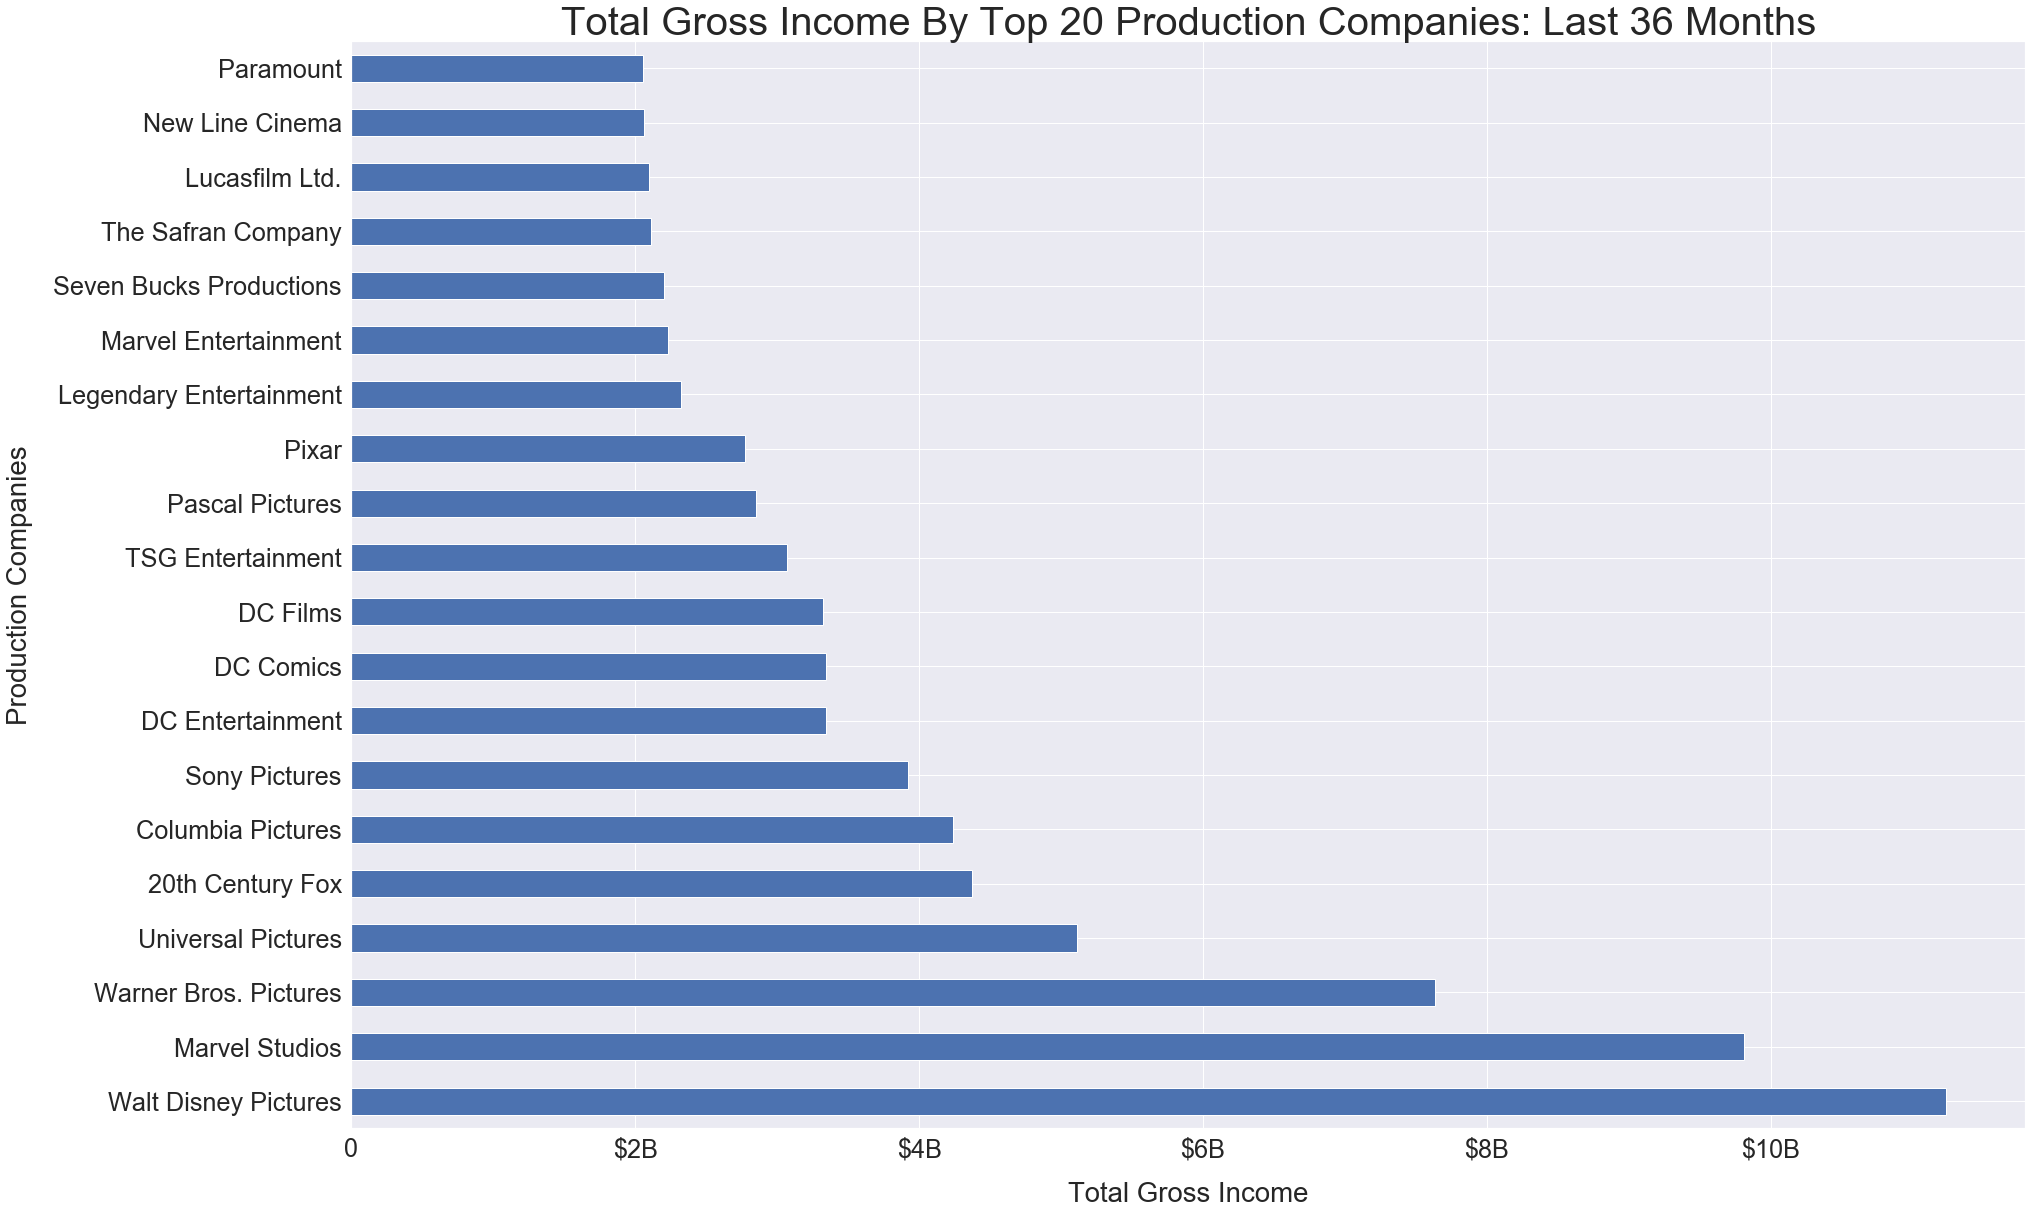

In [38]:
#Creating the visualization using Seaborn

fig,ax = plt.subplots()
sns.set(font_scale=2.5)
ctn.plot(kind='barh',figsize=(30,20),ax=ax)
plt.xlabel('Total Gross Income',labelpad=20)
plt.ylabel('Production Companies',labelpad=20)
plt.title('Total Gross Income By Top 20 Production Companies: Last 36 Months', y=1.0, fontsize=40)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(False)
ax.xaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Now: In Which Genres Are These Films?

Now, I'd like to investigate which genres are most prevalent within the top-earning films, so as to combine with these insights showing the production companies that have been involved wit these "most successful" films in the last 3 years.

One thing the above chart reveals which is important: top, well-known major studios are not just blowing through capital, they appear to be profitable. Moreover, and perhaps to be expected: the production companies connected with the highest net income from the respective films are a cut above the rest.

It would be valuable to investigate the specific focus of these companies. It <i>appears that</i> films in the areas of comic book, Disney and Pixar <i>characters</i> could be prevalent on the list, but let's dig in more.

In [39]:
#Leveraging a list comprehension as before inside of a function to loop through the dataframe effectively.

def cool_func_genres(row):

    genres = [c['name'] for c in row['genres']]
    letsgo = {}
    genres_list = []
    
    for i in genres:
        letsgo[i] = 1
        genres_list.append(i)
        unique_genres_list = set(genres_list)
        #Just in case I need this later, creating a list of unique genres
        ugl = list(unique_genres_list)
            
    return letsgo

In [88]:
#Now, to use the Apply method to run the Function above, so as to populate the DataFrame.
genre_top_dict = grand_df.apply(lambda r: cool_func_genres(r), axis=1).to_list()
#genre_top_dict

In [41]:
#Now, I'll tally up the number of times each genre is mentioned within the last 36 months' top-earning film list.
genre_top_tot = pd.DataFrame(genre_top_dict).sum().sort_values(ascending=False)
genre_top_tot

Action             90.0
Drama              74.0
Adventure          72.0
Science Fiction    62.0
Thriller           62.0
Comedy             60.0
Fantasy            42.0
Horror             34.0
Family             28.0
Crime              26.0
Animation          25.0
Romance            23.0
Mystery            16.0
Music               8.0
History             6.0
War                 6.0
TV Movie            2.0
dtype: float64

### Action, Drama + Thrillers FTW

Clearly, action and drama films are the most present in this list. Could going (mostly) all in on these two genres be the secret sauce to successful movie production? Although there are more aspects to consider to be sure, we can see that as it relates to the most income-positive films released in the last 36 months, action and drama take the cake.

OK, now to create a nice visualization. I'll use a variation of a Treemap I discovered.

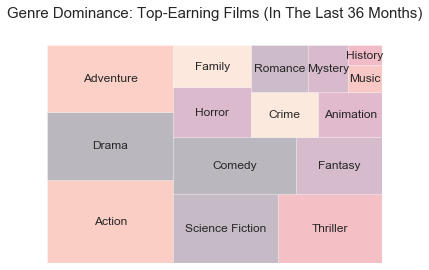

In [42]:
# Guidance obtained from these sources -- https://github.com/laserson/squarify 
#and https://python-graph-gallery.com/treemap/

x = 0
y = 0
width = 2000
height = 1250

#Removed the last 3 values in the dataframe to create well-organized visualization.
top_genre_viz = squarify.normalize_sizes(genre_top_tot.iloc[:15],width,height)
squarify.plot(sizes=top_genre_viz, label=genre_top_tot.index, alpha=.3, text_kwargs={'fontsize':12})

plt.title('Genre Dominance: Top-Earning Films (In The Last 36 Months)', y=1.1, fontsize=15)
plt.axis('off')
plt.show()

## Takeaway Update #1: Choose Action, Drama + Thriller Films With Confidence

The "Action" and "Drama" categories clearly stand out as it relates to films released in the last 36 months, and <i>investing</i> in producing these types of films seems to be a path worth exploring.

I thought that maybe <i>Animation</i> films would be higher with Walt Disney Studios being the top-earner (and it's worth delving deeper into which genre category Walt Disney specifically focuses on most, but the data does show that action films are most prevalent among the top-earners in the last 36 months!

---

##  🧗🏿 🌍 👨🏿‍🚀 Second Question:

## Is there a positive correlation between popularity and income in the last 36 months?

Now, my next goal is related to popularity and income. Without knowing <i>exactly</i> how each production company calculates its profits of course, the "net_income" column is what I've decided to use as a way to get a baseline sense. 

Since I've already done some cleaning for the last question related to net income, I'll review whether I can use some of the same code to find out more about the films with (arguably) the worst financial performance of the last 36 months, and whether these correlate to popularity scores.

I'll check on the entire list of films as well, to compare with the bottom-earners insights.

In [43]:
#Simple grouping that shows the net income for films released in the last 36 months.

simpl = grand_df.loc[:,['title','popularity','gross_income']].sort_values(by=['gross_income'],ascending=True)
simpl_for_plot = simpl.iloc[:100,:]
simpl_for_plot

title  popularity  gross_income
306                                 The Irishman      31.666    -151000000
570                                6 Underground      25.746    -150000000
529           The Nutcracker and the Four Realms      26.522     -60477354
223   Journey to China: The Mystery of Iron Mask      34.659     -49000000
648                                   Robin Hood      24.652     -26739886
..                                           ...         ...           ...
586                                          Tag      25.492      47100000
662  Valerian and the City of a Thousand Planets      24.511      48674228
339                               Den of Thieves      30.716      50509622
400                                 Ready or Not      29.048      51615777
168                                 Dark Phoenix      37.513      52442974

[100 rows x 3 columns]

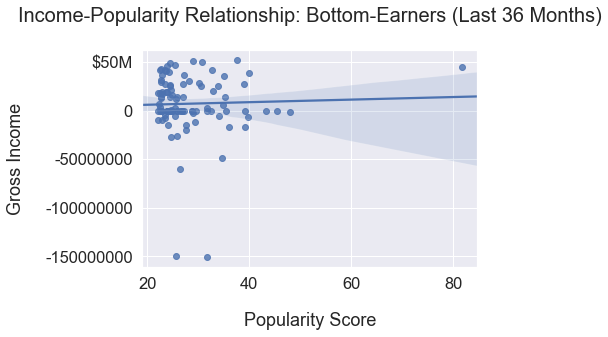

In [44]:
pop_net_neg = simpl_for_plot
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_neg["popularity"], y=pop_net_neg["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Bottom-Earners (Last 36 Months)', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## As Income Goes (Down) So Does Popularity?

OK! So, it seems that poplularity score and income have a positive correlation, at least with respect to films released in the last 36 months. However, to further cement the correlation, we would need to see a similar positive correlation with the top-earning films as well. Let's take a look.

In [45]:
#Reversing the sorting from the previous simpl variable

simpl_top = grand_df.loc[:,['title','popularity','gross_income']].sort_values(by=['gross_income'],ascending=False)
simpl_top.head(20)

title  popularity  gross_income
58                  Avengers: Endgame      49.739    2441800564
6              Avengers: Infinity War     103.327    1746239637
69                      The Lion King      47.495    1396943394
55                          Frozen II      49.938    1300026933
52                      Black Panther      51.228    1146739107
189    Jurassic World: Fallen Kingdom      36.509    1133459585
172          Star Wars: The Last Jedi      37.455    1132539889
147              Beauty and the Beast      39.228    1103521126
113                     Incredibles 2      42.559    1042805359
8                               Joker      90.487    1019251311
640           The Fate of the Furious      24.761     988764765
99                            Aquaman      44.219     988461807
62                     Captain Marvel      49.094     976274794
20          Spider-Man: Far from Home      69.551     971927996
117                       Toy Story 4      41.927     898394593
610    Jumanji: Welcome to the Jungle      25.248     872102237
106                           Aladdin      43.181     864612394
268                 Bohemian Rhapsody      32.944     842027543
24   Star Wars: The Rise of Skywalker      65.044     824144248
85                              Venom      45.640     739013954

[Text(0, 0.5, '')]

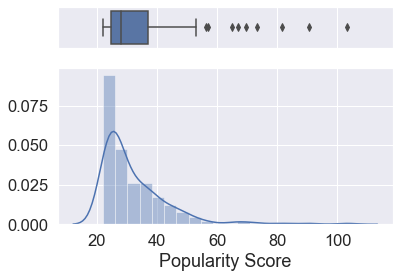

In [46]:
f, (xax_box, xax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .95)})
 
# Add a graph in each part
sns.boxplot(simpl_top["popularity"], ax=xax_box)
sns.distplot(simpl_top["popularity"], ax=xax_hist)
 
# Remove x axis name for the boxplot
xax_box.set(xlabel='')
xax_hist.set(xlabel='Popularity Score')
xax_hist.set(ylabel='')

## High Popularity Scores Are Rare, And That's Good For Business

Here we see that very few films have a popularity score of 50 or higher. But, of course this doesn't mean the film wasn't popular. However, what's more important perhaps is that the data shows something else!

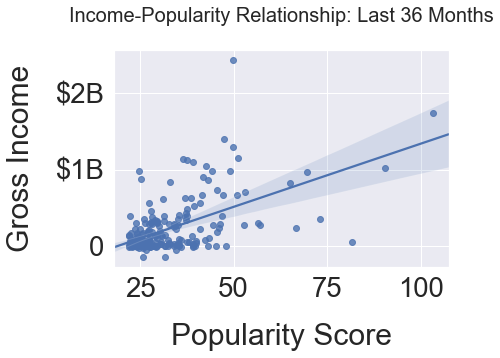

In [47]:
#Now, time to create the second scatterplot.

pop_net_pos = simpl_top
sns.set(font_scale=2.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_pos["popularity"], y=pop_net_pos["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Last 36 Months', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Takeaway #2: More Money More (Popularity) Problems? It Depends.

Interestingly enough, it looks like there's a slightly positive correlation between income and popularity scores. However, one can see above that it's <i>more than possible</i> for a film to rake in a significant amount of money <b>without</b> receiving a high popularity score within TMDb.

---

## 🧗🏿 🌍 👨🏿‍🚀 Third Question:

### Which originally non-English language films have had the most success, and ultimately, what's the most "income-positive" country according to the data?

It seems that a good popularity score is difficult to come by. But, what about for non-English language films? For this question, I'd like to investigate how popular non-English language films have done. The goal is to be able to compare with the main insights I've gathered so far.

The first thing I'll do is obtain the proper dataframe.

In [48]:
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg   
2    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
3    False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg   
4    False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg   
..     ...                               ...   
995  False  /ul5RJwqJYQ3zHUuKL5XmU7NMiRn.jpg   
996  False  /mPzJOUWOpQd0hy9p1UnBebfG1jZ.jpg   
997  False  /sOn1tOLzvhRaEtOdRP4dxmweNBN.jpg   
998  False  /xWxwM6UCzBTE9Hc9b31U1fBy5CJ.jpg   
999  False  /bpupiiGrBHSjq2tVyEvVAgFWZNv.jpg   

                                 belongs_to_collection     budget  \
0                                                 None          0   
1                                                 None  205000000   
2                                                 None          0   
3                                                 None          0   
4                                                 None          0   
..                                                 ...        ...   
995  {'id': 105324, 'name': 'Mirrors Collection', '...   35000000   
996                                               None          0   
997  {'id': 52760, 'name': 'Urban Legend Collection...   14000000   
998                                               None   90000000   
999  {'id': 425175, 'name': 'Texas Chainsaw (Reboot...    9500000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3    [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
996  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
997  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
999                     [{'id': 27, 'name': 'Horror'}]   

                                              homepage      id     imdb_id  \
0                  http://www.netflix.com/projectpower  605116   tt7550000   
1                           https://www.tenetfilm.com/  577922   tt6723592   
2         https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                       508570   tt3661394   
4                                                       621013   tt5843876   
..                                                 ...     ...         ...   
995                                                      13515   tt0790686   
996                        https://www.kellygang.film/  501395   tt4844140   
997                                                      12212   tt0192731   
998  http://www.sonypictures.com/movies/themagnific...  333484   tt2404435   
999                                                       9373   tt0324216   

    original_language                  original_title  \
0                  en                   Project Power   
1                  en                           Tenet   
2                  ru                         Спутник   
3                  en           The One and Only Ivan   
4                  en                 Chemical Hearts   
..                ...                             ...   
995                en                         Mirrors   
996                en  True History of the Kelly Gang   
997                en        Urban Legends: Final Cut   
998                en           The Magnificent Seven   
999                en     The Texas Chainsaw Massacre   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     246.384   
1    Armed with only one word - Tenet - and fightin...     171.505   
2    At the height of the Cold War, a Soviet spacec...     139.380   


In [49]:
#Organize (or, group) the movie list according to the original language

non_eng = pd.DataFrame(newshaq)
non_eng_checker = ~non_eng.original_language.str.contains('en')
non_eng_df = non_eng[non_eng_checker]
non_eng_df.sort_values('gross_income',ascending=False)

adult                     backdrop_path  \
822  False  /bGksau9GGu0uJ8DJQ8DYc9JW5LM.jpg   
265  False  /mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg   
161  False  /mSDsSDwaP3E7dEfUPWy4J0djt4O.jpg   
21   False  /ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg   
170  False  /iuFbU5jiNh8DAxLBGifZCvv3KmB.jpg   
..     ...                               ...   
680  False  /wZjsOvkv2jybgnTAuRF41WPnezs.jpg   
384  False  /pLHeRaGgy2e9qeTviZZfbWYqZ3s.jpg   
795  False  /sa7HV7c0VVFB6VuGFft8NflU8EG.jpg   
290  False  /aWsVwgG324dFQS5xHEjB7OCOT9w.jpg   
223  False  /mPPj0OXBP7uokY1hjkgdb13jhTY.jpg   

                                 belongs_to_collection    budget  \
822                                               None  13000000   
265                                               None         0   
161                                               None  19000000   
21                                                None  11363000   
170                                               None  24000000   
..                                                 ...       ...   
680                                               None  10000000   
384                                               None  12000000   
795                                               None  15050245   
290  {'id': 619537, 'name': 'Train to Busan Collect...  17000000   
223  {'id': 428046, 'name': 'Viy Collection', 'post...  49000000   

                                                genres  \
822  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   
265  [{'id': 10749, 'name': 'Romance'}, {'id': 16, ...   
161  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
21   [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
170  [{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...   
..                                                 ...   
680  [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
384  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
795  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...   
290  [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
223  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   

                                              homepage      id     imdb_id  \
822                                                      77338   tt1675434   
265    https://www.funimationfilms.com/movie/yourname/  372058   tt5311514   
161             http://movies.disney.com/spirited-away     129   tt0245429   
21                     https://www.parasite-movie.com/  496243   tt6751668   
170                                                       4935   tt0347149   
..                                                 ...     ...         ...   
680                                                      11713   tt0068767   
384                                                     581526  tt12763920   
795                                                       4552   tt0365376   
290  https://www.wellgousa.com/films/train-to-busan...  581392   tt8850222   
223  https://www.defiant-ent.com/product/the-iron-m...  428045   tt6218010   

    original_language        original_title  \
822                fr          Intouchables   
265                ja                 君の名は。   
161                ja              千と千尋の神隠し   
21                 ko                   기생충   
170                ja               ハウルの動く城   
..                ...                   ...   
680                zh                   精武門   
384                ko           다만 악에서 구하소서   
795                ko                장화, 홍련   
290                ko                    반도   
223                ru  Тайна Печати дракона   

                                              overview  popularity  \
822  A true story of two men who should never have ...      23.231   
265  High schoolers Mitsuha and Taki are complete s...      33.045   
161  A young girl, Chihiro, becomes trapped in a st...      38.255   
21   All unemployed, Ki-taek's family takes peculia...      66.793   
170  When Sophie, a shy young woman, is cursed with...      37

In [50]:
ne_df = non_eng_df.loc[:,['title','popularity','original_language','release_date','gross_income']].sort_values(by=['gross_income'],ascending=False)
ne_df

title  popularity original_language  \
822                            The Intouchables      23.231                fr   
265                                  Your Name.      33.045                ja   
161                               Spirited Away      38.255                ja   
21                                     Parasite      66.793                ko   
170                        Howl's Moving Castle      37.491                ja   
..                                          ...         ...               ...   
680                                Fist of Fury      24.320                zh   
384                        Deliver Us from Evil      29.450                ko   
795                       A Tale of Two Sisters      23.393                ko   
290                                   Peninsula      32.150                ko   
223  Journey to China: The Mystery of Iron Mask      34.659                ru   

    release_date  gross_income  
822   2011-11-02     413480871  
265   2016-08-26     357986087  
161   2001-07-20     255925095  
21    2019-05-30     234561070  
170   2004-11-19     212049757  
..           ...           ...  
680   1972-03-22     -10000000  
384   2020-08-05     -12000000  
795   2003-06-13     -15050245  
290   2020-07-15     -17000000  
223   2019-08-16     -49000000  

[80 rows x 5 columns]

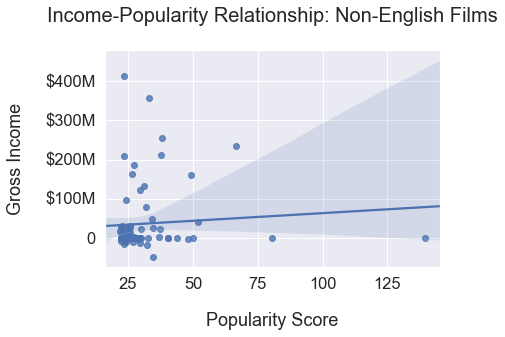

In [51]:
pop_net_non_eng = ne_df
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_non_eng["popularity"], y=pop_net_non_eng["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Non-English Films', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

In [52]:
lang_money = newshaq.groupby(['original_language'])['gross_income'].sum().sort_values(ascending=False)
lang_money

original_language
en    189339687591
ja      1538297066
fr       562182645
ko       381169466
it       250061588
sv        96271911
es        50874431
cn        39574953
pt        27341770
de        19182353
pl               0
hi               0
zh       -10000000
ru       -12923983
Name: gross_income, dtype: int64

In [53]:
def cool_func_langs(row):

    num_of_langs = [l['name'] for l in row['spoken_languages']]
    letsgo = {}
    num_of_lang_list = []
    
    for i in num_of_langs:
        if i != '':
            letsgo[i] = 1
            
    return letsgo

In [87]:
lang_sum = newshaq.apply(lambda r: cool_func_langs(r), axis=1).to_list()
#lang_sum

In [86]:
lang_sum_list = []
for l in lang_sum:
    lang_sum_list.append(len(l))

#lang_sum_list

In [56]:
lang_sum_df_col = pd.DataFrame(lang_sum_list,columns=['number_of_languages'])
lang_sum_df_col

number_of_languages
0                      2
1                      1
2                      1
3                      1
4                      2
..                   ...
995                    1
996                    1
997                    1
998                    1
999                    1

[1000 rows x 1 columns]

In [57]:
major_df = pd.concat([newshaq, lang_sum_df_col], axis=1)
major_df.head()

adult                     backdrop_path belongs_to_collection     budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None          0   
1  False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg                  None  205000000   
2  False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None          0   
3  False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg                  None          0   
4  False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg                  None          0   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3  [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   

                                       homepage      id     imdb_id  \
0           http://www.netflix.com/projectpower  605116   tt7550000   
1                    https://www.tenetfilm.com/  577922   tt6723592   
2  https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                508570   tt3661394   
4                                                621013   tt5843876   

  original_language         original_title  \
0                en          Project Power   
1                en                  Tenet   
2                ru                Спутник   
3                en  The One and Only Ivan   
4                en        Chemical Hearts   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     246.384   
1  Armed with only one word - Tenet - and fightin...     171.505   
2  At the height of the Cold War, a Soviet spacec...     139.380   
3  Ivan is a 400-pound silverback gorilla who sha...     124.706   
4  A high school transfer student finds a new pas...     112.711   

                        poster_path  \
0  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg   
1  /k68nPLbIST6NP96JmTxmZijEvCA.jpg   
2  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg   
3  /e7ZsW5EbLbQwoGx0548KCmCAXA9.jpg   
4  /hlb0iUmKwZX3Qd6qiIvyEROGxbm.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 9996, 'logo_path': '/3tvBqYsBhxWeHlu62...   
2  [{'id': 100821, 'logo_path': None, 'name': 'Vo...   
3  [{'id': 47706, 'logo_path': None, 'name': 'All...   
4  [{'id': 20580, 'logo_path': '/tkFE81jJIqiFYPP8...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
1  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2020-08-22        0   
2           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   2020-07-14        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-21        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-21        0   

   runtime                                   spoken_languages    status  \
0      113  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1      150           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2      113           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
3       95           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4       93  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                                             tagline                  title  \
0  What would you risk for five minutes of pure p...          Project Power   
1                                     Time runs out.                  Tenet   
2          The only survivor did not come back alone                Sputnik   
3       It's never too late to discover who you are.  The One and Only Ivan   
4                          Fall in love. Fall apart.        Chemical Hearts   

   video  vote_average  vote_count  gross_income  number_of_languages  
0  False           6.7         699     

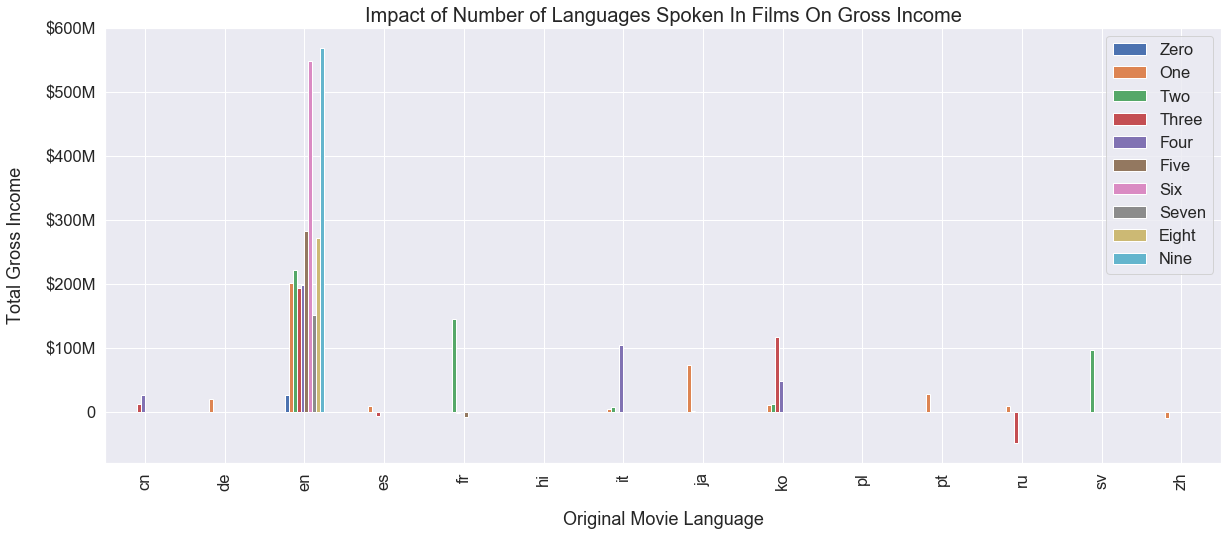

In [59]:
mdflang = major_df.groupby(['original_language','number_of_languages'])['gross_income'].mean().unstack()
mdflang = mdflang.where(pd.notnull(mdflang), None)
mdflang.columns = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

fig, ax = plt.subplots(figsize=(20,8))
mdflang.plot(kind='bar',ax=ax)


sns.set(font_scale=1.5)

plt.xlabel('Original Movie Language',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Impact of Number of Languages Spoken In Films On Gross Income', y=1.0, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(True)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))


plt.show()

## Takeaway #3: English Films With Many Languages Spoken In Film = $$$

What's clear from the data here is that -- over time -- the films which have English as their original language and <b>also</b> have other languages being spoken in the film are by and large the top earners.

We can even see that as the number of languages spoken in the originally-English-speaking films goes up, the net income goes up as well!

## 🧗🏿 🌍 👨🏿‍🚀 Fourth Question:

### How do films that belong to collections fare compared to films not apart of collections?

Now, what I'll do next is investigate films that are part of collections. I've noticed a decent amount of collections in the dataset and I'm curious how these films fare compared to the others.

In [60]:
#First, to look at the dataset again to refresh!
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg   
2    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
3    False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg   
4    False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg   
..     ...                               ...   
995  False  /ul5RJwqJYQ3zHUuKL5XmU7NMiRn.jpg   
996  False  /mPzJOUWOpQd0hy9p1UnBebfG1jZ.jpg   
997  False  /sOn1tOLzvhRaEtOdRP4dxmweNBN.jpg   
998  False  /xWxwM6UCzBTE9Hc9b31U1fBy5CJ.jpg   
999  False  /bpupiiGrBHSjq2tVyEvVAgFWZNv.jpg   

                                 belongs_to_collection     budget  \
0                                                 None          0   
1                                                 None  205000000   
2                                                 None          0   
3                                                 None          0   
4                                                 None          0   
..                                                 ...        ...   
995  {'id': 105324, 'name': 'Mirrors Collection', '...   35000000   
996                                               None          0   
997  {'id': 52760, 'name': 'Urban Legend Collection...   14000000   
998                                               None   90000000   
999  {'id': 425175, 'name': 'Texas Chainsaw (Reboot...    9500000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3    [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
996  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
997  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
999                     [{'id': 27, 'name': 'Horror'}]   

                                              homepage      id     imdb_id  \
0                  http://www.netflix.com/projectpower  605116   tt7550000   
1                           https://www.tenetfilm.com/  577922   tt6723592   
2         https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                       508570   tt3661394   
4                                                       621013   tt5843876   
..                                                 ...     ...         ...   
995                                                      13515   tt0790686   
996                        https://www.kellygang.film/  501395   tt4844140   
997                                                      12212   tt0192731   
998  http://www.sonypictures.com/movies/themagnific...  333484   tt2404435   
999                                                       9373   tt0324216   

    original_language                  original_title  \
0                  en                   Project Power   
1                  en                           Tenet   
2                  ru                         Спутник   
3                  en           The One and Only Ivan   
4                  en                 Chemical Hearts   
..                ...                             ...   
995                en                         Mirrors   
996                en  True History of the Kelly Gang   
997                en        Urban Legends: Final Cut   
998                en           The Magnificent Seven   
999                en     The Texas Chainsaw Massacre   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     246.384   
1    Armed with only one word - Tenet - and fightin...     171.505   
2    At the height of the Cold War, a Soviet spacec...     139.380   


In [61]:
newshaq_sum = newshaq.loc[:,['belongs_to_collection','gross_income','original_language','vote_average','vote_count']].sort_values(by='gross_income', ascending=False)
newshaq_sum

belongs_to_collection  gross_income  \
138  {'id': 87096, 'name': 'Avatar Collection', 'po...    2550965087   
58   {'id': 86311, 'name': 'The Avengers Collection...    2441800564   
260                                               None    1987463944   
295  {'id': 10, 'name': 'Star Wars Collection', 'po...    1823223624   
6    {'id': 86311, 'name': 'The Avengers Collection...    1746239637   
..                                                 ...           ...   
570                                               None    -150000000   
306                                               None    -151000000   
111                                               None    -200000000   
1                                                 None    -205000000   
333  {'id': 645, 'name': 'James Bond Collection', '...    -242000000   

    original_language  vote_average  vote_count  
138                en           7.4       21891  
58                 en           8.3       14689  
260                en           7.9       17550  
295                en           7.4       14831  
6                  en           8.3       19404  
..                ...           ...         ...  
570                en           6.3        2448  
306                en           7.7        3879  
111                en           0.0           0  
1                  en           6.8          18  
333                en           0.0           0  

[1000 rows x 5 columns]

In [62]:
newshaq_less = newshaq.dropna(subset = ['belongs_to_collection','poster_path'])
newshaq_less = newshaq_less.loc[:,['belongs_to_collection','gross_income','original_language','vote_average','vote_count']].sort_values(by='gross_income', ascending=False)
newshaq_less

belongs_to_collection  gross_income  \
138  {'id': 87096, 'name': 'Avatar Collection', 'po...    2550965087   
58   {'id': 86311, 'name': 'The Avengers Collection...    2441800564   
295  {'id': 10, 'name': 'Star Wars Collection', 'po...    1823223624   
6    {'id': 86311, 'name': 'The Avengers Collection...    1746239637   
386  {'id': 328, 'name': 'Jurassic Park Collection'...    1521713208   
..                                                 ...           ...   
467  {'id': 731067, 'name': 'Bird Box Collection', ...     -19800000   
179  {'id': 167985, 'name': 'Richie Rich Collection...     -40000000   
223  {'id': 428046, 'name': 'Viy Collection', 'post...     -49000000   
192  {'id': 735127, 'name': 'Extraction Collection'...     -65000000   
333  {'id': 645, 'name': 'James Bond Collection', '...    -242000000   

    original_language  vote_average  vote_count  
138                en           7.4       21891  
58                 en           8.3       14689  
295                en           7.4       14831  
6                  en           8.3       19404  
386                en           6.6       15922  
..                ...           ...         ...  
467                en           6.9        6808  
179                en           5.7        1416  
223                ru           6.2         148  
192                en           7.4        2925  
333                en           0.0           0  

[439 rows x 5 columns]

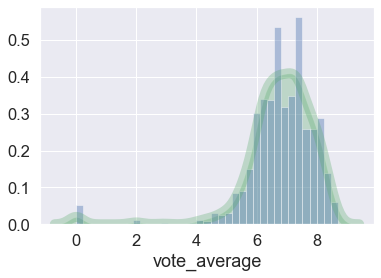

In [63]:
sns.distplot(a = newshaq_sum["vote_average"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

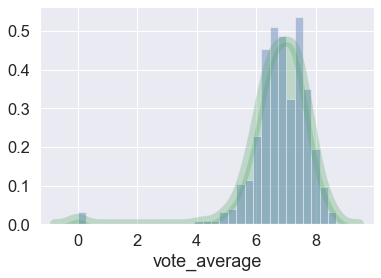

In [64]:
sns.distplot(a = newshaq_less["vote_average"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

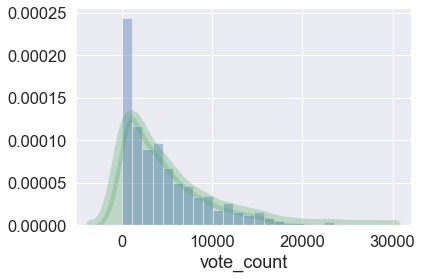

In [65]:
sns.distplot(a = newshaq_sum["vote_count"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

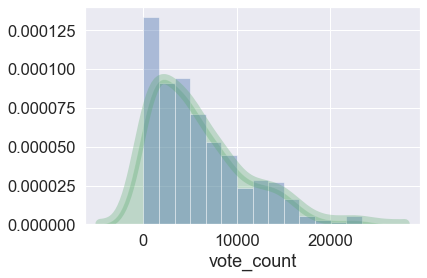

In [66]:
sns.distplot(a = newshaq_less["vote_count"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

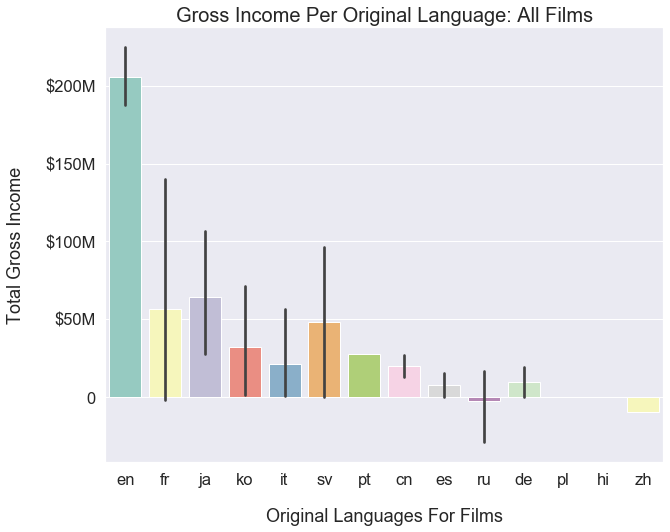

In [67]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=newshaq_sum, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: All Films', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

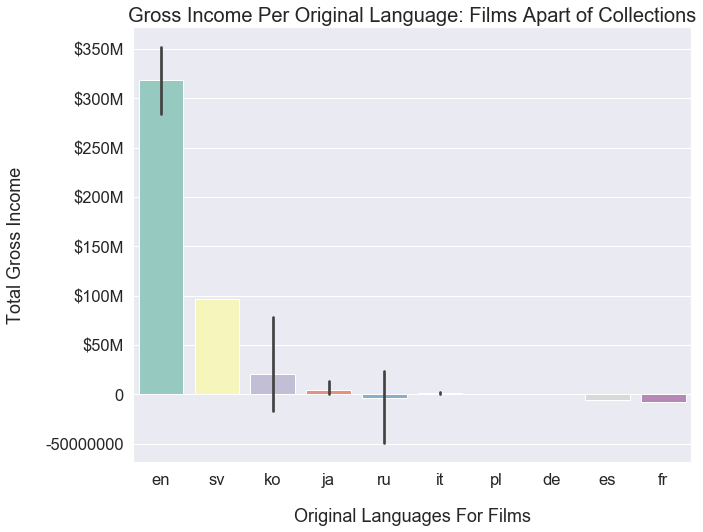

In [68]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=newshaq_less, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: Films Apart of Collections', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

In [69]:
newshaq_sum_2 = newshaq.loc[:,['belongs_to_collection','gross_income']].sort_values(by='gross_income', ascending=False).sum()
newshaq_sum_2

gross_income    192281719791
dtype: int64

In [70]:
newshaq_less = newshaq.dropna(subset = ['belongs_to_collection','poster_path'])
newshaq_less_2 = newshaq_less.loc[:,['belongs_to_collection','gross_income']].sort_values(by='gross_income', ascending=False).sum()
newshaq_less_2

gross_income    133485906705
dtype: int64

In [71]:
collections_diff = sum(newshaq_sum_2) - sum(newshaq_less_2)
print(f'Total gross income without films apart of a collection included is: ${float(collections_diff)}')
print('That is north of $55 billion USD')

Total gross income without films apart of a collection included is: $58795813086.0
That is north of $55 billion USD


In [72]:
collections_makeup = newshaq_less_2 / newshaq_sum_2
print(f'Films apart of collections makeup {float(collections_makeup)} of the total gross income!')
print('That is more than 2/3!')

Films apart of collections makeup 0.6942204742608505 of the total gross income!
That is more than 2/3!


## Takeaway #4: Collections Make Sense...As Long As They Are English-Speaking?

It's pretty interesting to see that films apart of collections account for such a large portion of the income. But, this isn't surprising, either. All in all, the voting averages are similar, with a bit of a nod towards films apart of collections.

---

## 🧗🏿 🌍 👨🏿‍🚀 Increase To 3000 Titles: A Comparison

To end, I'll use the API to access TMDb once more, but this time I'll retrieve 3000 titles, and then what I'd like to do is do some comparative analysis to see if the one trend matches or is similar with those I discovered for the 1000 titles!

In [73]:
three_k = []

for i in (range(1,151)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    three_k.extend(doop)

print(doop[1]['title'])
print(three_k[1]['title'])
len(three_k)

Mayar Jonjal
Tenet


3000

In [74]:
three_k_ids = []
for i in three_k:
    three_k_ids.append(i['id'])
print(three_k_ids[0:20])

[605116, 577922, 594718, 508570, 621013, 98566, 299536, 626393, 475557, 99861, 271110, 27205, 419704, 521034, 703771, 718444, 632618, 141052, 495764, 539885]


In [75]:
print(three_k[5]['id'])
print(len(three_k_ids))

98566
3000


In [76]:
three_k_df = []

for k in three_k_ids:
    movie = tmdb.Movies(k)
    response = movie.info()
    three_k_df.append(response)

In [77]:
len(three_k_df)

3000

In [78]:
three_df = pd.DataFrame(three_k_df)
three_df

adult                     backdrop_path  \
0     False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1     False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg   
2     False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
3     False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg   
4     False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg   
...     ...                               ...   
2995  False  /ht8B5vtSfp6ZPSJL8AwQQEb091c.jpg   
2996  False  /qYbIsiCrd8Jn2dC06nHNxxIjjXc.jpg   
2997  False  /lU9rDQJPDxtb3p0ix31BVXyXV71.jpg   
2998  False  /lSXyKBefjOXIABjEU2hExWgG3rm.jpg   
2999  False  /yTIvOi9x7C9vTbzfG4GqMoh9MaZ.jpg   

                                  belongs_to_collection     budget  \
0                                                  None          0   
1                                                  None  205000000   
2                                                  None          0   
3                                                  None          0   
4                                                  None          0   
...                                                 ...        ...   
2995                                               None          0   
2996  {'id': 41437, 'name': 'Paranormal Activity Col...      15000   
2997                                               None   46000000   
2998                                               None   40000000   
2999                                               None    3600000   

                                                 genres  \
0     [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1     [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2     [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3     [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4     [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
...                                                 ...   
2995  [{'id': 37, 'name': 'Western'}, {'id': 28, 'na...   
2996  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
2997  [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...   
2998  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
2999                      [{'id': 18, 'name': 'Drama'}]   

                                               homepage      id     imdb_id  \
0                   http://www.netflix.com/projectpower  605116   tt7550000   
1                            https://www.tenetfilm.com/  577922   tt6723592   
2          https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                        508570   tt3661394   
4                                                        621013   tt5843876   
...                                                 ...     ...         ...   
2995                                                       9028   tt0063032   
2996           http://www.paranormalactivity-movie.com/   23827   tt1179904   
2997                       http://www.silencemovie.com/   68730   tt0490215   
2998                http://gothikamovie.warnerbros.com/    4970   tt0348836   
2999  https://www.mgm.com/#/our-titles/1251/Midnight...    3116   tt0064665   

     original_language         original_title  \
0                   en          Project Power   
1                   en                  Tenet   
2                   ru                Спутник   
3                   en  The One and Only Ivan   
4                   en        Chemical Hearts   
...                ...                    ...   
2995                it     Il grande silenzio   
2996                en    Paranormal Activity   
2997                en                Silence   
2998                en                Gothika   
2999                en        Midnight Cowboy   

                                               overview  popularity  \
0     An ex-soldier, a teen and a cop collide in New...     246.384   
1     Armed with only one word - Tenet - and fightin...     171.505   
2     At the height of the Cold War, a Soviet spacec...     139.380   
3     Ivan is a 400-pound silverback gorilla 

In [ ]:
# Gross income top production companies

In [79]:
three_df['gross_income'] = (three_df.loc[:,'revenue'] - three_df.loc[:,'budget'])
three_df['gross_income'] = three_df['gross_income'].astype('int64')
three_df

adult                     backdrop_path  \
0     False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1     False  /wzJRB4MKi3yK138bJyuL9nx47y6.jpg   
2     False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
3     False  /fFdOJxmG2U7IYYlkFKtDk1nGPhF.jpg   
4     False  /pGTXJcZQIgqzFZlWy6KxlamlTHK.jpg   
...     ...                               ...   
2995  False  /ht8B5vtSfp6ZPSJL8AwQQEb091c.jpg   
2996  False  /qYbIsiCrd8Jn2dC06nHNxxIjjXc.jpg   
2997  False  /lU9rDQJPDxtb3p0ix31BVXyXV71.jpg   
2998  False  /lSXyKBefjOXIABjEU2hExWgG3rm.jpg   
2999  False  /yTIvOi9x7C9vTbzfG4GqMoh9MaZ.jpg   

                                  belongs_to_collection     budget  \
0                                                  None          0   
1                                                  None  205000000   
2                                                  None          0   
3                                                  None          0   
4                                                  None          0   
...                                                 ...        ...   
2995                                               None          0   
2996  {'id': 41437, 'name': 'Paranormal Activity Col...      15000   
2997                                               None   46000000   
2998                                               None   40000000   
2999                                               None    3600000   

                                                 genres  \
0     [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1     [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2     [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3     [{'id': 10751, 'name': 'Family'}, {'id': 35, '...   
4     [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
...                                                 ...   
2995  [{'id': 37, 'name': 'Western'}, {'id': 28, 'na...   
2996  [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...   
2997  [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...   
2998  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
2999                      [{'id': 18, 'name': 'Drama'}]   

                                               homepage      id     imdb_id  \
0                   http://www.netflix.com/projectpower  605116   tt7550000   
1                            https://www.tenetfilm.com/  577922   tt6723592   
2          https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
3                                                        508570   tt3661394   
4                                                        621013   tt5843876   
...                                                 ...     ...         ...   
2995                                                       9028   tt0063032   
2996           http://www.paranormalactivity-movie.com/   23827   tt1179904   
2997                       http://www.silencemovie.com/   68730   tt0490215   
2998                http://gothikamovie.warnerbros.com/    4970   tt0348836   
2999  https://www.mgm.com/#/our-titles/1251/Midnight...    3116   tt0064665   

     original_language         original_title  \
0                   en          Project Power   
1                   en                  Tenet   
2                   ru                Спутник   
3                   en  The One and Only Ivan   
4                   en        Chemical Hearts   
...                ...                    ...   
2995                it     Il grande silenzio   
2996                en    Paranormal Activity   
2997                en                Silence   
2998                en                Gothika   
2999                en        Midnight Cowboy   

                                               overview  popularity  \
0     An ex-soldier, a teen and a cop collide in New...     246.384   
1     Armed with only one word - Tenet - and fightin...     171.505   
2     At the height of the Cold War, a Soviet spacec...     139.380   
3     Ivan is a 400-pound silverback gorilla 

In [80]:
three_df_simpl = three_df.loc[:,['title','popularity','belongs_to_collection','original_language','gross_income']].sort_values(by=['gross_income'],ascending=False)
three_df_simpl

title  popularity  \
138                         Avatar      39.747   
58               Avengers: Endgame      49.739   
260                        Titanic      33.210   
295   Star Wars: The Force Awakens      32.021   
6           Avengers: Infinity War     103.327   
...                            ...         ...   
2701               The Lone Ranger      16.243   
1072  Mowgli: Legend of the Jungle      21.518   
111                          Mulan      42.861   
1                            Tenet     171.505   
333                 No Time to Die      30.879   

                                  belongs_to_collection original_language  \
138   {'id': 87096, 'name': 'Avatar Collection', 'po...                en   
58    {'id': 86311, 'name': 'The Avengers Collection...                en   
260                                                None                en   
295   {'id': 10, 'name': 'Star Wars Collection', 'po...                en   
6     {'id': 86311, 'name': 'The Avengers Collection...                en   
...                                                 ...               ...   
2701                                               None                en   
1072                                               None                en   
111                                                None                en   
1                                                  None                en   
333   {'id': 645, 'name': 'James Bond Collection', '...                en   

      gross_income  
138     2550965087  
58      2441800564  
260     1987463944  
295     1823223624  
6       1746239637  
...            ...  
2701    -165710090  
1072    -175000000  
111     -200000000  
1       -205000000  
333     -242000000  

[3000 rows x 5 columns]

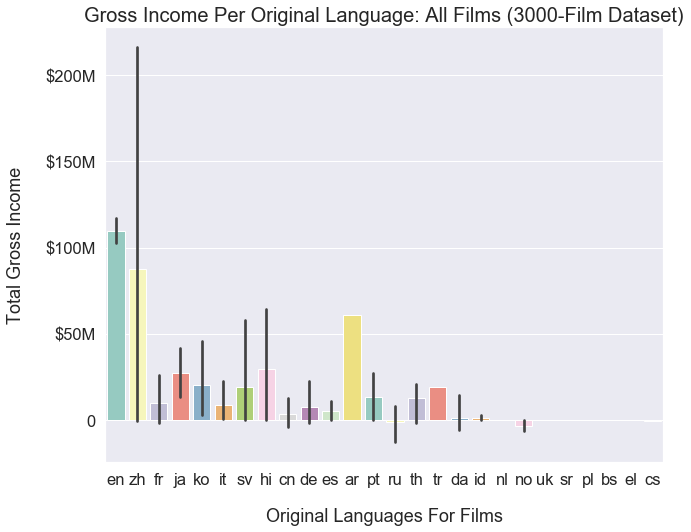

In [81]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=three_df_simpl, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: All Films (3000-Film Dataset)', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

## 🧗🏿 🌍 👨🏿‍🚀 Summary + Recommendations:

1. Consider producing films that are or could be apart of collections.
2. Produce films that consist of at least 4 languages being spoken in the film.
3. Invest in the production of films whose original language is Slovenian, Korean or Japanese.
4. Go with action, drama or thriller film production.
5. Take on potentially polarizing film productions (while adhering to other recommendations).

### Further Research To Consider:

1. Getting insight into what films are currently in production and comparing details with the history of production company investment and film performance.
2. How do metrics like "popularity" and "vote count" relate to the potential amount of time a customer would spend within a streaming / online movie watching platform? And, how would gaining this "consumer attention" translate to cash inflow in other areas?

In [84]:
practice_df = pd.DataFrame(three_df_simpl)
practice_df

title  popularity  \
138                         Avatar      39.747   
58               Avengers: Endgame      49.739   
260                        Titanic      33.210   
295   Star Wars: The Force Awakens      32.021   
6           Avengers: Infinity War     103.327   
...                            ...         ...   
2701               The Lone Ranger      16.243   
1072  Mowgli: Legend of the Jungle      21.518   
111                          Mulan      42.861   
1                            Tenet     171.505   
333                 No Time to Die      30.879   

                                  belongs_to_collection original_language  \
138   {'id': 87096, 'name': 'Avatar Collection', 'po...                en   
58    {'id': 86311, 'name': 'The Avengers Collection...                en   
260                                                None                en   
295   {'id': 10, 'name': 'Star Wars Collection', 'po...                en   
6     {'id': 86311, 'name': 'The Avengers Collection...                en   
...                                                 ...               ...   
2701                                               None                en   
1072                                               None                en   
111                                                None                en   
1                                                  None                en   
333   {'id': 645, 'name': 'James Bond Collection', '...                en   

      gross_income  
138     2550965087  
58      2441800564  
260     1987463944  
295     1823223624  
6       1746239637  
...            ...  
2701    -165710090  
1072    -175000000  
111     -200000000  
1       -205000000  
333     -242000000  

[3000 rows x 5 columns]

In [85]:
btc_list = [i['name'] for i in practice_df['belongs_to_collection'] if i != None]
#btc_list

In [82]:
#Now, to create the DataFrame.
company_total_gross_2 = pd.DataFrame(list(company_gross_dict.items()),columns=
             ['production_companies','total_gross_income']).sort_values(by='total_gross_income',ascending=False)
company_total_gross_2.describe()

total_gross_income
count        1.486000e+03
mean         1.226116e+08
std          5.865581e+08
min         -1.510000e+08
25%          0.000000e+00
50%          0.000000e+00
75%          1.254888e+07
max          1.123065e+10